In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784

In [3]:
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# Generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise



11501568/11490434 [==============================] - 0s 0us/step


In [4]:

class Encoder(K.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = K.layers.Dense(units=hidden_dim, activation=tf.nn.relu)
        
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation

In [5]:

class Decoder(K.layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(Decoder, self).__init__()
        self.output_layer = K.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, encoded):
        activation = self.output_layer(encoded)
        return activation 

In [6]:
class Autoencoder(K.Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(hidden_dim=hidden_dim, original_dim=original_dim)

    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

In [7]:
model = Autoencoder(hidden_dim=hidden_dim, original_dim=original_dim)

model.compile(loss='mse', optimizer='adam')

loss = model.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=max_epochs,
                batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 6s 11ms/step - loss: 0.0507 - val_loss: 0.0335
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0303 - val_loss: 0.0275
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0269 - val_loss: 0.0259
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0260 - val_loss: 0.0254
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0251 - val_loss: 0.0248
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0250 - val_loss: 0.0245
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0247 - val_loss: 0.0242
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0245 - val_loss: 0.0243
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0245 - val_loss: 0.024

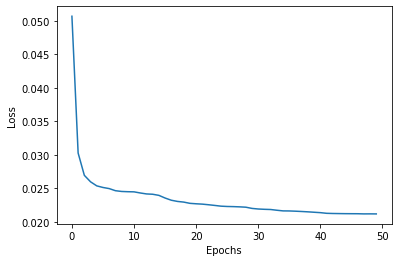

In [8]:

plt.plot(range(max_epochs), loss.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

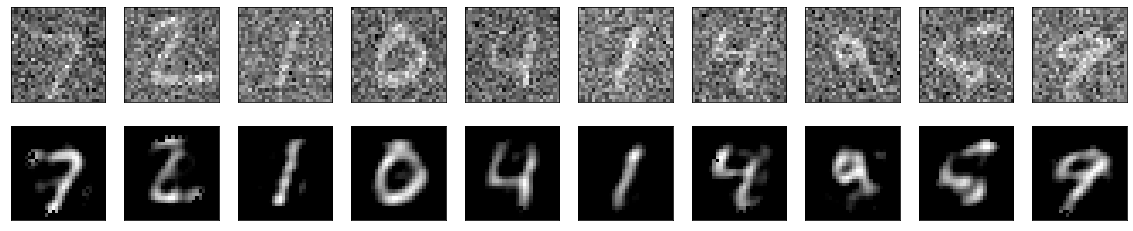

In [9]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test_noisy)[index].numpy().reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()